### Notebook Description

**U-Net Image Segmentation**

This notebook is designed to implement and understand the U-Net architecture, a deep learning model widely used for image segmentation tasks. The notebook walks through the process of preparing the dataset, building the U-Net model, training it, and evaluating its performance.

**Objectives:**
1. Understand the fundamentals of image segmentation and why U-Net is a popular choice for this task.
2. Learn how to preprocess and split image datasets for training and testing.
3. Implement the U-Net architecture using PyTorch.
4. Train the model and visualize its predictions to evaluate its effectiveness.

**How to Use This Notebook:**
- The notebook is divided into sections such as data preparation, model definition, training, and evaluation.
- Each section contains code and comments explaining the purpose of the steps.
- Students are encouraged to complete the TODO sections, which guide them to implement missing parts of the code or analyze results.

**What You'll Learn:**
- Practical knowledge of handling image datasets.
- Building and customizing a U-Net model.
- Evaluating deep learning models for segmentation tasks.
- Gaining hands-on experience with PyTorch.

**Prerequisites:**
- Familiarity with Python and basic programming concepts.
- A basic understanding of deep learning and PyTorch.
- Knowledge of image processing concepts (optional but helpful).

**Tips for Success:**
- Follow the comments and instructions in the code.
- Refer to the provided links and resources to understand U-Net better.
- Experiment with the code to explore how changes affect the results.

---

This introduction can be added as a Markdown cell at the top of the notebook. Let me know if you'd like me to insert it into the notebook directly!

In [5]:
# This cell imports the required libraries and sets up the environment for the U-Net project.
# TODO for Students: Review these imports and identify which libraries are unfamiliar to you. Research their purpose.

# General libraries for file handling and image processing
import os
import PIL
import time
import glob
import torch
import pickle

# Libraries for data manipulation and visualization
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specific modules for image and path handling
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split


In [2]:
!gdown "https://drive.google.com/uc?id=1ffbbyoPf-I3Y0iGbBahXpWqYdGd7xxQQ" -O dataset.tar.gz
!tar -xf dataset.tar.gz

Downloading...
From (original): https://drive.google.com/uc?id=1ffbbyoPf-I3Y0iGbBahXpWqYdGd7xxQQ
From (redirected): https://drive.google.com/uc?id=1ffbbyoPf-I3Y0iGbBahXpWqYdGd7xxQQ&confirm=t&uuid=50d03eda-51ed-461a-a589-9c9718d5489d
To: /content/dataset.tar.gz
100% 4.40G/4.40G [01:09<00:00, 63.6MB/s]


In [17]:
# Specify the device to be used for computations.
# If a GPU is available, it will use GPU device 1 ("cuda:1"), otherwise it will fall back to the CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_folder = Path("dataset")
origins_folder = data_folder / "images"
masks_folder = data_folder / "masks"

In [ ]:
class LungDataset(torch.utils.data.Dataset):
    """
    TODO:
    1. Implement a custom PyTorch Dataset for handling lung images and segmentation masks.
    2. Initialize with the list of image-mask pairs, the origins and masks folders, and optional transformations.
    """
    def __init__(self, origin_mask_list, origins_folder, masks_folder, transforms=None):
        """
        TODO: Initialize the dataset with:
        - `origin_mask_list`: List of (image_name, mask_name) pairs.
        - `origins_folder`: Path to the folder containing the original images.
        - `masks_folder`: Path to the folder containing the masks.
        - `transforms`: Optional transformations to apply.
        """

    def __getitem__(self, idx):
        """
        TODO:
        1. Retrieve the image and mask pair based on the provided index `idx`.
        2. Load the image and mask using `Image.open` and convert them if necessary.
        3. Apply the provided transformations if any.
        4. Normalize the image and convert the mask to a binary tensor.
        5. Return the preprocessed image and mask tensors.
        """
        return origin, mask

    def __len__(self):
        """
        TODO: Return the total number of image-mask pairs in the dataset.
        """
        return len(self.origin_mask_list)


class Pad():
    """
    TODO:
    1. Create a transformation to add random padding to the image and mask.
    2. Initialize with `max_padding` to control the maximum padding size.
    """
    def __init__(self, max_padding):
        self.max_padding = max_padding

    def __call__(self, sample):
        """
        TODO:
        1. Add random padding within the range of `max_padding`.
        2. Ensure the padding is consistent for both the image and the mask.
        3. Experiment with different padding styles or fill values.
        """
        return origin, mask


class Crop():
    """
    TODO:
    1. Implement a random cropping transformation for images and masks.
    2. Initialize with `max_shift` to control the maximum cropping shift.
    """
    def __init__(self, max_shift):
        self.max_shift = max_shift

    def __call__(self, sample):
        """
        TODO:
        1. Apply random cropping based on top-left and bottom-right shifts.
        2. Ensure the crop dimensions are consistent for both image and mask.
        3. Validate that the cropped dimensions are appropriate.
        """
        return origin, mask



class Resize():
    """
    TODO:
    1. Implement a transformation to resize the image and mask to a specific output size.
    2. Initialize with `output_size` as a tuple (height, width).
    """
    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, sample):
        """
        TODO:
        1. Resize both the image and the mask to the specified output size.
        2. Ensure no distortions occur during resizing unless intentional.
        """
        return origin, mask


def blend(origin, mask1=None, mask2=None):
    """
    TODO:
    1. Create a visualization function to blend the original image with one or two masks.
    2. Convert the image tensor back to a PIL image for visualization.
    3. Blend the masks with different colors and transparency levels.
    """
    return img


In [11]:
batch_size = 4  # Batch size for training
origins_list = [f.stem for f in origins_folder.glob("*.png")]  # List of image file names
masks_list = [f.stem for f in masks_folder.glob("*.png")]  # List of mask file names
print(len(origins_list))  # Number of images
print(len(masks_list))  # Number of masks

800
704


In [10]:
# Create a list of tuples linking masks to their corresponding images.
origin_mask_list = [(mask_name.replace("_mask", ""), mask_name) for mask_name in masks_list]

# Split data into training, validation, and testing sets.
splits = {}
splits["train"], splits["test"] = train_test_split(origin_mask_list, test_size=0.2, random_state=42)
splits["train"], splits["val"] = train_test_split(splits["train"], test_size=0.1, random_state=42)

In [ ]:
# TODO: Implement the validation and testing transformations.
val_test_transforms = torchvision.transforms.Compose([
])

# TODO: Implement the training transformations by including padding, cropping, and resizing.
train_transforms = torchvision.transforms.Compose([
])

# TODO: Create the datasets for training, validation, and testing.
datasets = ...

# TODO: Initialize the dataloaders for each dataset.
dataloaders = ...


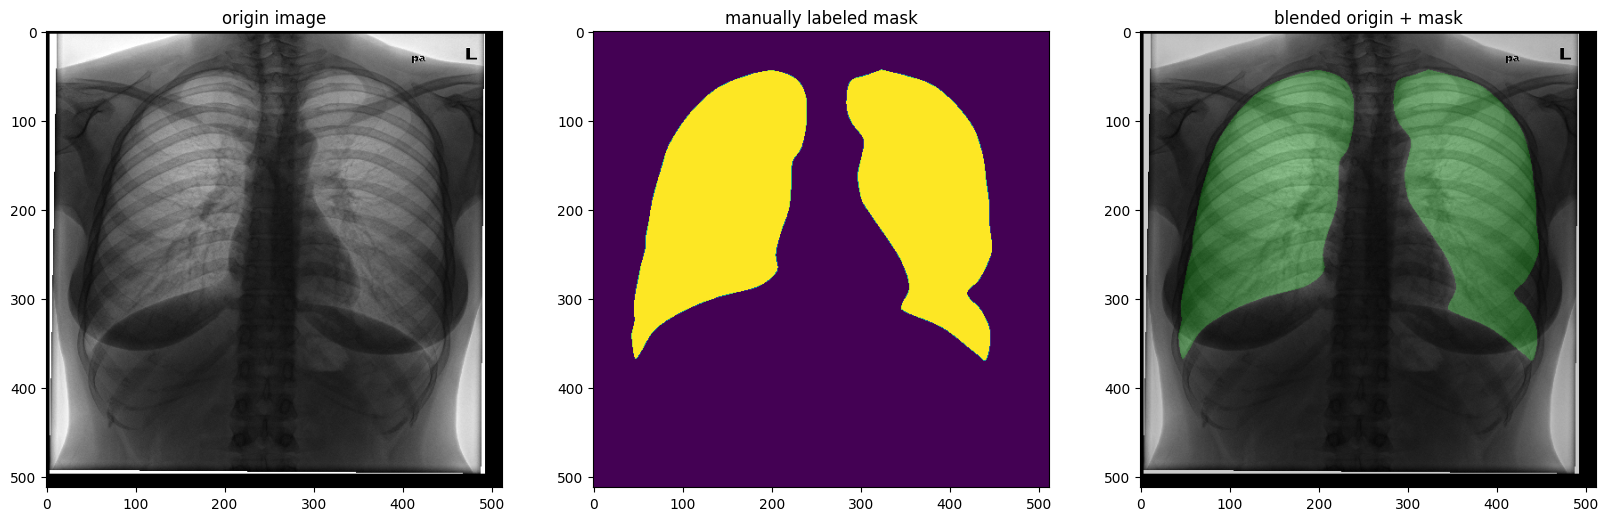

In [ ]:
idx = 0
phase = "train"

plt.figure(figsize=(20, 10))
origin, mask = datasets[phase][idx]

# TODO: Convert the origin and mask tensors to PIL images for visualization.
pil_origin = ...
pil_mask = ...

# TODO: Plot the original image.

# TODO: Plot the manually labeled mask.

# TODO: Plot the blended view of the original image and mask.



In [ ]:
class Block(torch.nn.Module):
    def __init__(self, in_channels, mid_channel, out_channels, batch_norm=False):
        super().__init__()
        # TODO: Define the first convolutional layer
        self.conv1 = None
        # TODO: Define the second convolutional layer
        self.conv2 = None

        self.batch_norm = batch_norm
        if batch_norm:
            # TODO: Define batch normalization layers
            self.bn1 = None
            self.bn2 = None

    def forward(self, x):
        # TODO: Apply the first convolutional layer and batch normalization (if enabled)
        pass


class UNet(torch.nn.Module):
    def up(self, x, size):
        # TODO: Implement upsampling
        pass

    def down(self, x):
        # TODO: Implement max pooling for downsampling
        pass

    def __init__(self, in_channels, out_channels, batch_norm=False, upscale_mode="nearest"):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.batch_norm = batch_norm
        self.upscale_mode = upscale_mode

        # TODO: Define encoder blocks
        self.enc1 = None
        self.enc2 = None
        self.enc3 = None
        self.enc4 = None

        # TODO: Define center block
        self.center = None

        # TODO: Define decoder blocks
        self.dec4 = None
        self.dec3 = None
        self.dec2 = None
        self.dec1 = None

        # TODO: Define final output layer
        self.out = None

    def forward(self, x):
        # TODO: Implement forward pass for UNet
        pass


class PretrainedUNet(torch.nn.Module):
    def up(self, x, size):
        # TODO: Implement upsampling
        pass

    def down(self, x):
        # TODO: Implement max pooling for downsampling
        pass

    def __init__(self, in_channels, out_channels, batch_norm=False, upscale_mode="nearest"):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.batch_norm = batch_norm
        self.upscale_mode = upscale_mode

        # TODO: Define initial convolution layer to adjust input channels
        self.init_conv = None

        # TODO: Extract pretrained VGG-11 encoder layers
        self.conv1 = None
        self.conv2 = None
        self.conv3 = None
        self.conv3s = None
        self.conv4 = None
        self.conv4s = None
        self.conv5 = None
        self.conv5s = None

        # TODO: Define center and decoder blocks
        self.center = None
        self.dec5 = None
        self.dec4 = None
        self.dec3 = None
        self.dec2 = None
        self.dec1 = None

        # TODO: Define final output layer
        self.out = None

    def forward(self, x):
        # TODO: Implement forward pass for Pretrained UNet
        pass


In [15]:
def jaccard(y_true, y_pred):
    """Calculate Jaccard Index (IoU) for a batch of images."""
    num = y_true.size(0)  # Batch size
    eps = 1e-7  # Small constant to prevent division by zero

    # Flatten the tensors for pixel-wise comparison
    y_true_flat = y_true.view(num, -1)
    y_pred_flat = y_pred.view(num, -1)

    # Calculate intersection and union
    intersection = (y_true_flat * y_pred_flat).sum(1)
    union = ((y_true_flat + y_pred_flat) > 0.0).float().sum(1)

    # Compute Jaccard score
    score = intersection / (union + eps)
    return score.sum() / num  # Average score over batch


def dice(y_true, y_pred):
    """Calculate Dice coefficient (F1 score) for a batch of images."""
    num = y_true.size(0)  # Batch size
    eps = 1e-7  # Small constant to prevent division by zero

    # Flatten the tensors for pixel-wise comparison
    y_true_flat = y_true.view(num, -1)
    y_pred_flat = y_pred.view(num, -1)

    # Calculate intersection
    intersection = (y_true_flat * y_pred_flat).sum(1)

    # Compute Dice score
    score = (2 * intersection) / (y_true_flat.sum(1) + y_pred_flat.sum(1) + eps)
    return score.sum() / num  # Average score over batch


In [ ]:
# TODO: Initialize the PretrainedUNet model with appropriate parameters.
unet = PretrainedUNet(
    in_channels=None,  # TODO: Specify the number of input channels
    out_channels=None,  # TODO: Specify the number of output channels
    batch_norm=None,  # TODO: Enable or disable batch normalization
    upscale_mode=None  # TODO: Specify the upsampling mode
)

# TODO: Move the model to the appropriate device (CPU or GPU).
unet = unet.to(device)

# TODO: Print the model to verify its structure.
unet


PretrainedUNet(
  (init_conv): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3s): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4s): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5s): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (center): Block(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchN

In [19]:
# TODO: Set training configurations such as log file, epochs, and optimizer.
train_log_filename = None  # TODO: Specify log file name
epochs = None  # TODO: Define the number of epochs
best_val_loss = np.inf
model_name = None  # TODO: Specify model checkpoint name
optimizer = None  # TODO: Initialize optimizer (e.g., Adam)

# TODO: Initialize history list to store training and validation metrics.
hist = []

# Training loop
for e in range(epochs):
    start_t = time.time()  # Track the start time of the epoch.

    # Training phase
    print("train phase")
    unet.train()
    train_loss = 0.0
    for origins, masks in dataloaders["train"]:
        num = origins.size(0)  # Batch size

        # TODO: Move input data and targets to the device (CPU or GPU).
        origins = None  # TODO: Move origins to device
        masks = None  # TODO: Move masks to device

        # TODO: Reset gradients and perform forward and backward passes.

        # TODO: Accumulate training loss for reporting.
        print(".", end="")  # Print progress

    train_loss = train_loss / len(datasets['train'])  # Normalize training loss
    print()

    # Validation phase
    print("validation phase")
    unet.eval()
    val_loss = 0.0
    val_jaccard = 0.0
    val_dice = 0.0

    for origins, masks in dataloaders["val"]:
        num = origins.size(0)  # Batch size

        # TODO: Move validation data and targets to the device.

        with torch.no_grad():  # Disable gradient computation for validation.
            outs = None  # TODO: Perform forward pass
            softmax = None  # TODO: Apply log-softmax
            val_loss += None  # TODO: Compute validation loss

            # TODO: Compute Jaccard and Dice metrics for evaluation.

        print(".", end="")  # Print progress
    val_loss = None  # TODO: Normalize validation loss
    val_jaccard = None  # TODO: Normalize Jaccard score
    val_dice = None  # TODO: Normalize Dice score
    print()

    end_t = time.time()  # Track the end time of the epoch.
    spended_t = end_t - start_t

    # TODO: Log training and validation metrics.
    with open(train_log_filename, "a") as train_log_file:
        report = None  # TODO: Format report string

        # TODO: Append metrics to the history list for future analysis.
        hist.append({
            "time": spended_t,
            "train_loss": train_loss,
            "val_loss": val_loss,
            "val_jaccard": val_jaccard,
            "val_dice": val_dice,
        })

        print(report)  # TODO: Print the metrics
        train_log_file.write(report + "\n")  # TODO: Write metrics to the log file
        print()


train phase
...............................................................................................................................
validation phase
...............
epoch: 1/20, time: 189.78534531593323, train loss: 0.19653227672039755, 
val loss: 0.12217853335957778, val jaccard: 0.8884699992966234, val dice: 0.9397114755814535

train phase
...............................................................................................................................
validation phase
...............
epoch: 2/20, time: 181.92755842208862, train loss: 0.10587698341947299, 
val loss: 0.11545559097277491, val jaccard: 0.8549241183096903, val dice: 0.9192221321557698

train phase
...............................................................................................................................
validation phase
...............
epoch: 3/20, time: 181.40333032608032, train loss: 0.081280764987464, 
val loss: 0.09347013057323925, val jaccard: 0.8818085643283108, val dice: 0.

epochs: 20, overall time: 60.0m, mean epoch time: 181.07279481887818s


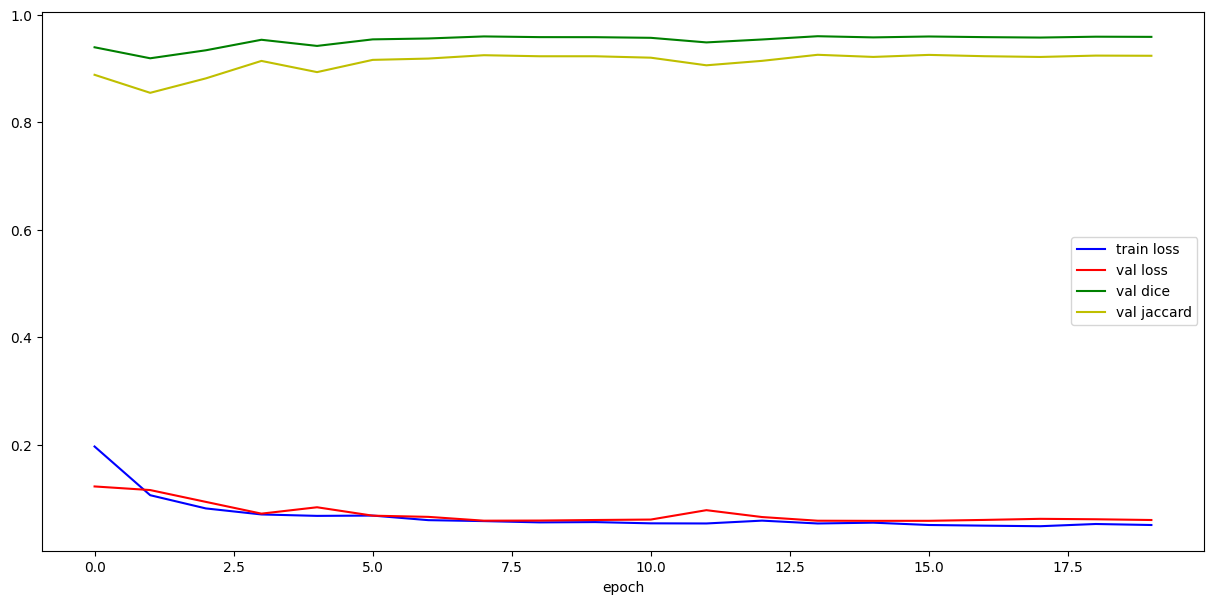

In [22]:
# TODO: Initialize a plot to visualize training and validation metrics.
plt.figure(figsize=(15, 7))

# TODO: Extract and plot training loss history.
train_loss_hist = None  # TODO: Extract training loss from `hist`.
plt.plot(None, None, "b", label="train loss")  # TODO: Plot training loss.

# TODO: Extract and plot validation loss history.
val_loss_hist = None  # TODO: Extract validation loss from `hist`.
plt.plot(None, None, "r", label="val loss")  # TODO: Plot validation loss.

# TODO: Extract and plot Dice score history.
val_dice_hist = None  # TODO: Extract Dice scores from `hist`.
plt.plot(None, None, "g", label="val dice")  # TODO: Plot Dice scores.

# TODO: Extract and plot Jaccard score history.
val_jaccard_hist = None  # TODO: Extract Jaccard scores from `hist`.
plt.plot(None, None, "y", label="val jaccard")  # TODO: Plot Jaccard scores.

# TODO: Add labels and legend to the plot.
plt.legend()
plt.xlabel(None)  # TODO: Add label for x-axis.

# TODO: Compute overall training time and mean epoch time.
time_hist = None  # TODO: Extract time per epoch from `hist`.
overall_time = None  # TODO: Calculate total training time in minutes.
mean_epoch_time = None  # TODO: Calculate mean epoch time.

# TODO: Print summary of training statistics.
print(None)  # TODO: Format and print training statistics.

In [23]:
# TODO: Evaluate the model on the test dataset and compute metrics.
unet.eval()
test_loss = 0.0
test_jaccard = 0.0
test_dice = 0.0

# TODO: Iterate through the test dataloader.
for origins, masks in dataloaders["test"]:
    num = origins.size(0)

    # TODO: Move data to the device.
    origins = None
    masks = None

    with torch.no_grad():  # Disable gradient calculation for evaluation.
        outs = None  # TODO: Perform forward pass
        softmax = None  # TODO: Apply log-softmax
        test_loss += None  # TODO: Compute test loss

        # TODO: Calculate Jaccard and Dice metrics.
        outs = None  # TODO: Get class predictions
        masks = None  # TODO: Convert masks to float
        test_jaccard += None  # TODO: Compute Jaccard
        test_dice += None  # TODO: Compute Dice
    print(".", end="")  # Print progress

# TODO: Compute average metrics.
test_loss = None  # TODO: Calculate average test loss
test_jaccard = None  # TODO: Calculate average Jaccard score
test_dice = None  # TODO: Calculate average Dice score

# TODO: Print the results.
print()
print(None)  # TODO: Print test loss
print(None)  # TODO: Print test Jaccard
print(None)  # TODO: Print test Dice



....................................
avg test loss: 0.05144721660630923
avg test jaccard: 0.922738623534534
avg test dice: 0.959097869430028


.........
red area - predict
green area - ground truth
yellow area - intersection


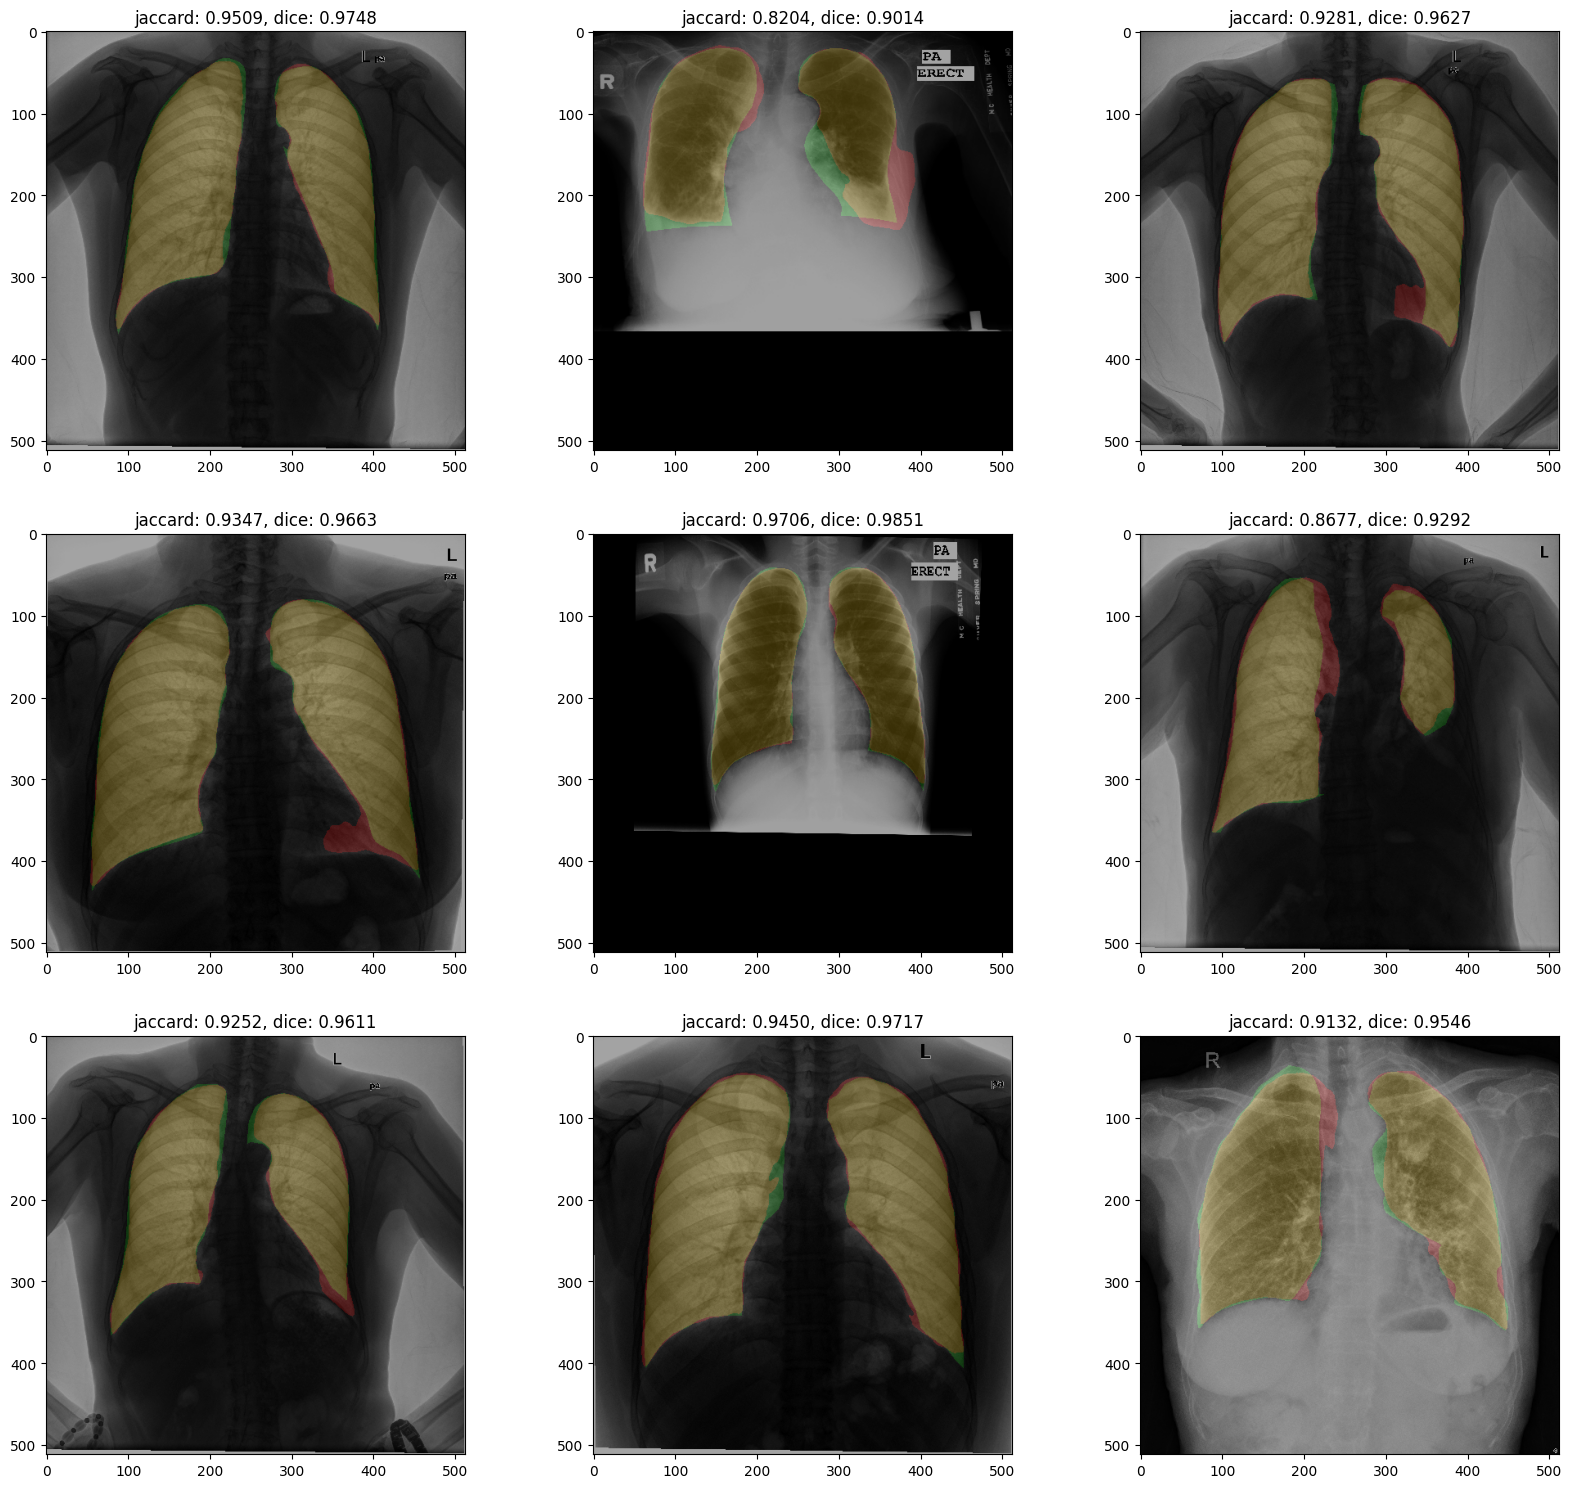

In [25]:
# TODO: Visualize predictions on random samples from the test dataset.

# Number of samples to visualize and the dataset phase.
num_samples = 9
phase = 'test'

# TODO: Create a subset of random samples from the specified phase.
subset = torch.utils.data.Subset(
    datasets[phase],
    None  # TODO: Randomly select indices from the dataset.
)
random_samples_loader = torch.utils.data.DataLoader(subset, batch_size=1)

# TODO: Initialize the figure for visualization.
plt.figure(figsize=(None, None))  # TODO: Define figure size.

# Iterate through the random samples.
for idx, (origin, mask) in enumerate(random_samples_loader):
    plt.subplot((None // 3) + 1, 3, idx+1)  # TODO: Set subplot grid dimensions.

    # TODO: Move the input data to the appropriate device.
    origin = None
    mask = None

    with torch.no_grad():  # Disable gradient computation for prediction.

        # TODO: Compute evaluation metrics (Jaccard and Dice scores).
        jaccard_score = None
        dice_score = None

        # TODO: Move data back to the CPU for visualization.
        origin = None
        out = None
        mask = None

        # TODO: Visualize the blended output (prediction and ground truth).

print()
print("red area - predict")
print("green area - ground truth")
print("yellow area - intersection")
